<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


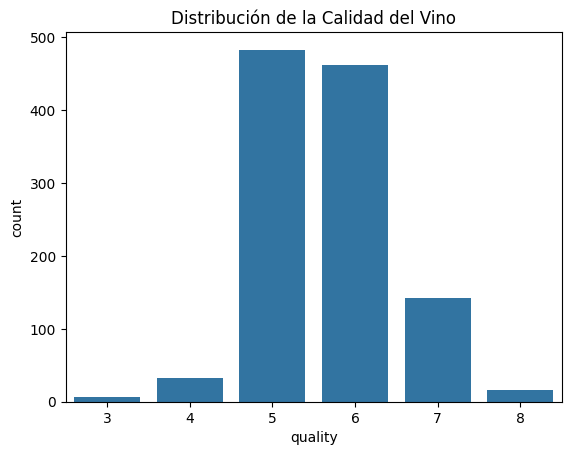

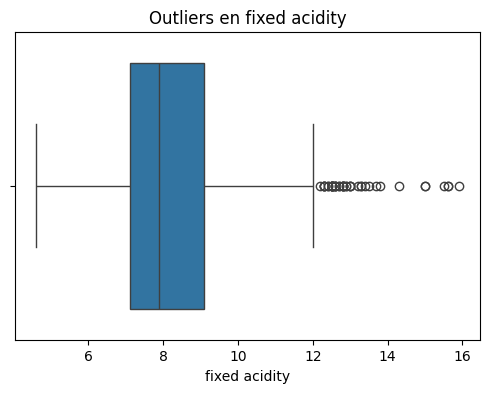

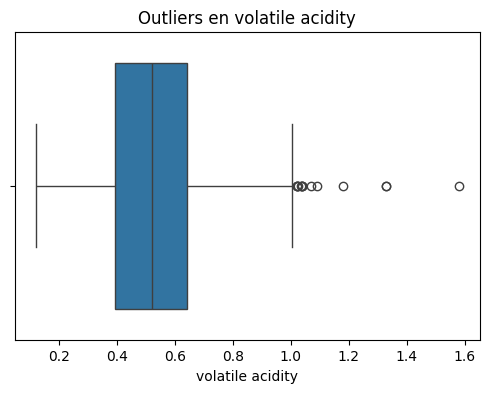

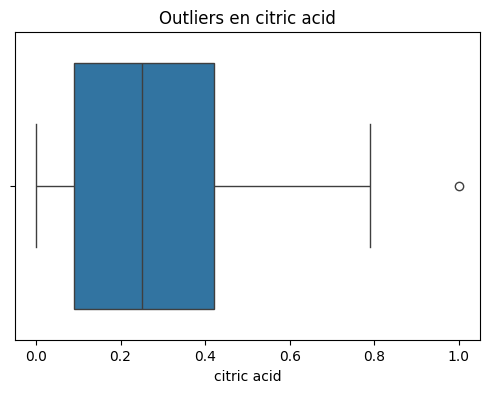

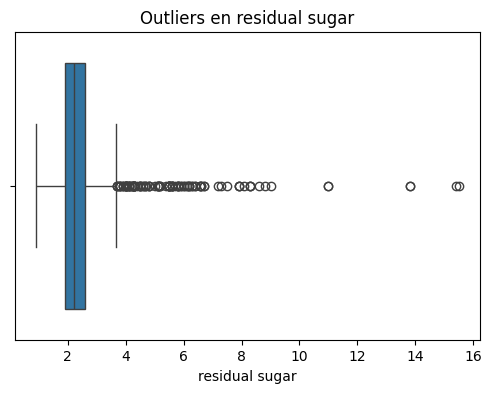

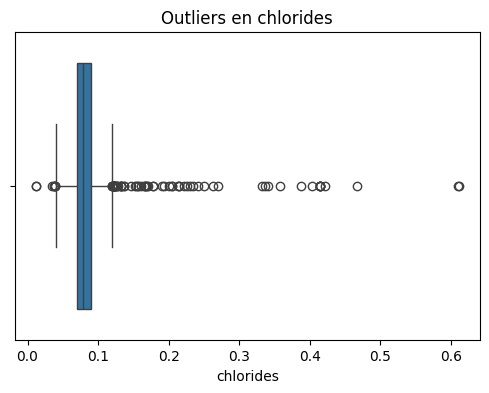

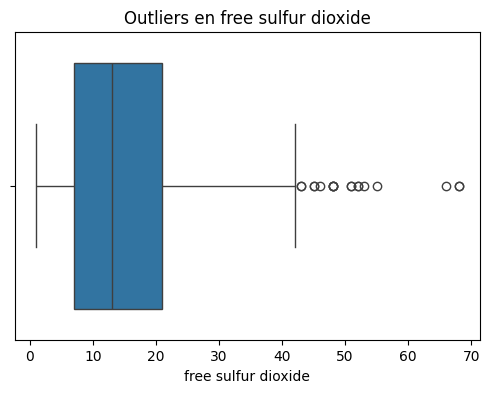

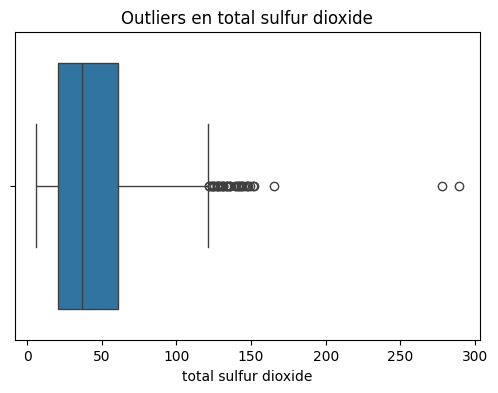

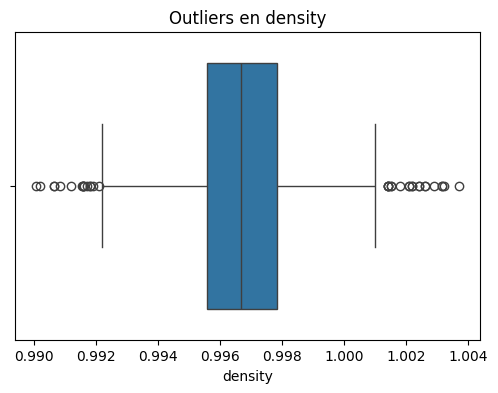

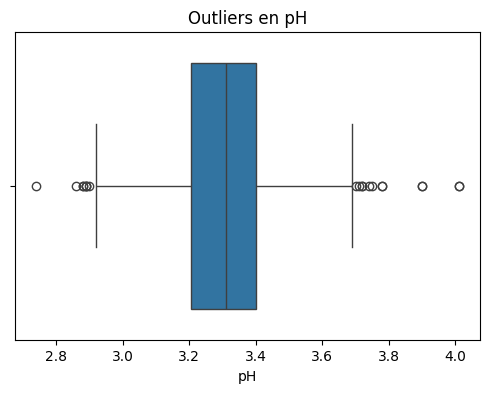

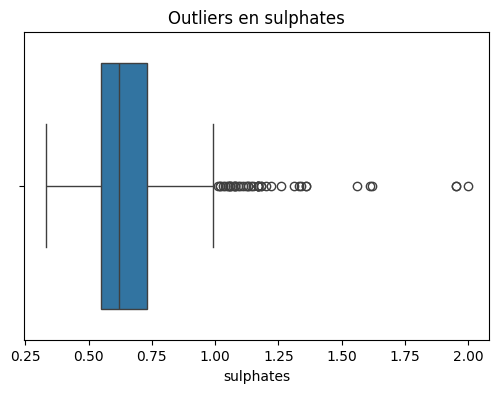

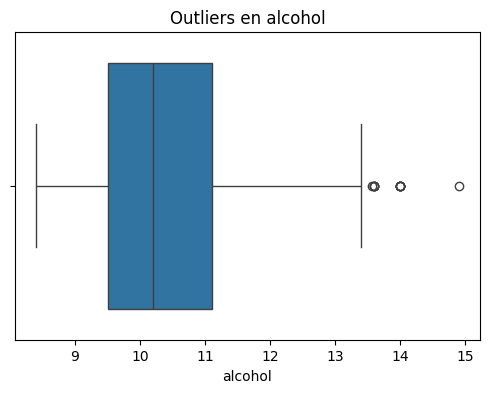

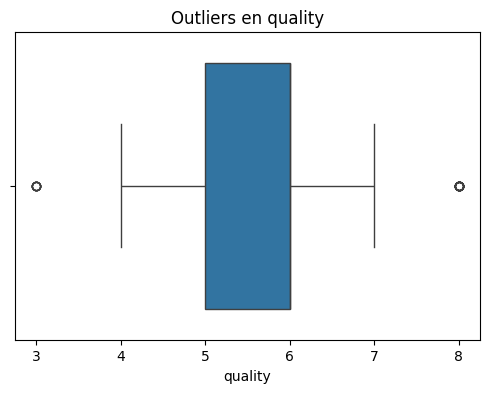

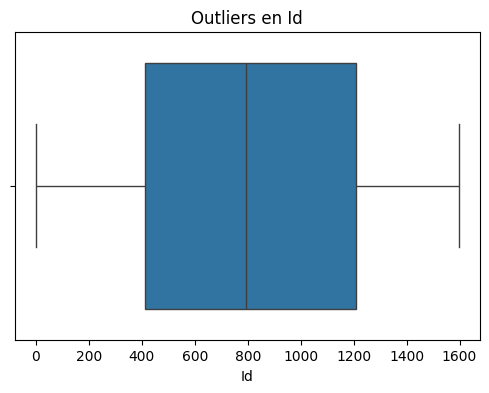

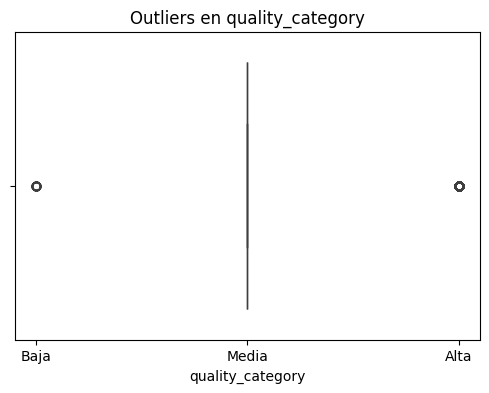

Reporte de Clasificación para KNeighborsClassifier:

              precision    recall  f1-score   support

        Alta       0.53      0.40      0.46        45
        Baja       0.00      0.00      0.00         9
       Media       0.88      0.94      0.91       289

    accuracy                           0.85       343
   macro avg       0.47      0.45      0.46       343
weighted avg       0.81      0.85      0.83       343

Matriz de Confusión:
[[ 18   0  27]
 [  0   0   9]
 [ 16   1 272]]
Exactitud: 0.8454810495626822
Reporte de Clasificación para RandomForestClassifier:

              precision    recall  f1-score   support

        Alta       0.62      0.53      0.57        45
        Baja       0.00      0.00      0.00         9
       Media       0.90      0.95      0.92       289

    accuracy                           0.87       343
   macro avg       0.51      0.49      0.50       343
weighted avg       0.84      0.87      0.85       343

Matriz de Confusión:
[[ 24   0  2

C:\Users\sopor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sopor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sopor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

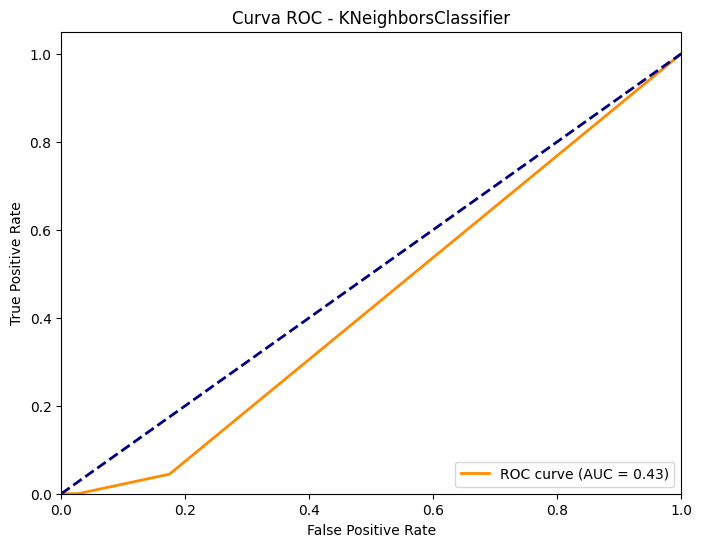

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset (suponiendo que el archivo esté disponible en formato CSV)

df_wine = pd.read_csv("C:/Users/sopor/Desktop/Curso Coding Dojo/Machine Learning/Prediccion Vino/WineQT.csv")

# Revisar las primeras filas 
df_wine.head()
# Obtener información básica
df_wine.info()
# Descripcion estadística de las variables
df_wine.describe()

# Visualización de la distribución de la variable calidad del vino
sns.countplot(x="quality", data=df)
plt.title("Distribución de la Calidad del Vino")
plt.show()

# Revisar valores nulos
df_wine.isnull().sum()

# Visualización de posibles outliers mediante boxplots
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers en {col}')
    plt.show()

# Crear categorías para la variable quality
df_wine["quality_category"] = pd.cut(df["quality"], bins=[0, 4, 6, 10], labels=["Baja", "Media", "Alta"])

# Ver las primeras filas
df_wine.head()

from sklearn.model_selection import train_test_split

# Dividir datos en variables predictoras (X) y objetivo (y)
X = df_wine.drop(["quality", "quality_category"], axis=1)
y = df_wine["quality_category"]  # O 'quality' si prefieres un enfoque regresivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo y los parámetros para GridSearch
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": [3, 5, 7, 9, 11]}

# Buscar los mejores parámetros
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

# Mejor modelo
best_knn = grid_search_knn.best_estimator_

from sklearn.ensemble import RandomForestClassifier

# Definir y entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

from sklearn.ensemble import RandomForestClassifier

# Definir y entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

from sklearn.linear_model import LogisticRegression

# Definir y entrenar el modelo
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Función para evaluar los modelos
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"Reporte de Clasificación para {modelo.__class__.__name__}:\n")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Exactitud:", accuracy_score(y_test, y_pred))

# Evaluar los tres modelos
evaluar_modelo(best_knn, X_test_scaled, y_test)
evaluar_modelo(rf, X_test_scaled, y_test)
evaluar_modelo(lr, X_test_scaled, y_test)

from sklearn.metrics import roc_curve, auc

# Función para graficar la curva ROC
def curva_roc(modelo, X_test, y_test):
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Alta')
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {modelo.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

# Graficar la curva ROC para el mejor modelo
curva_roc(best_knn, X_test_scaled, y_test)


